In [2]:
import pandas as pd
import numpy as np
import random
import scipy.stats

In [3]:
pop_size = 25000000
supp_rate = .88
not_rate = .12
x = np.array(["support", "not"])
possible_entries = np.repeat(x, [supp_rate*pop_size, not_rate*pop_size], axis=0)
print(type(possible_entries))
possible_entries

<class 'numpy.ndarray'>


array(['support', 'support', 'support', ..., 'not', 'not', 'not'],
      dtype='<U7')

In [4]:
sampled_entries = random.sample(list(possible_entries), k=1000)

In [5]:
# Suppose the proportion of American adults who support the expansion of solar energy is p = 0:88,
# which is our parameter of interest. If we were to take a poll of 1000 American adults on this
# topic, the estimate would not be perfect, but how close might we expect the sample proportion in
# the poll would be to 88%? We want to understand, how does the sample proportion phat behave when
# the true population proportion is 0.88.

pop_size = 2500000
supp_rate = .88
not_rate = .12
prop_list = list()
for i in range(0,100):
    x = np.array(["support", "not"])
    possible_entries = np.repeat(x, [supp_rate*pop_size, not_rate*pop_size], axis=0)
    sampled_entries = random.sample(list(possible_entries), k=1000)
    prop = sampled_entries.count("support")/1000
    prop_list.append(prop)

prop_list

[0.878,
 0.881,
 0.859,
 0.882,
 0.868,
 0.893,
 0.876,
 0.885,
 0.878,
 0.889,
 0.882,
 0.882,
 0.884,
 0.871,
 0.887,
 0.874,
 0.879,
 0.883,
 0.872,
 0.877,
 0.904,
 0.88,
 0.877,
 0.889,
 0.882,
 0.876,
 0.875,
 0.899,
 0.871,
 0.875,
 0.867,
 0.879,
 0.887,
 0.877,
 0.87,
 0.889,
 0.87,
 0.886,
 0.88,
 0.88,
 0.886,
 0.888,
 0.881,
 0.881,
 0.9,
 0.88,
 0.891,
 0.883,
 0.875,
 0.889,
 0.892,
 0.871,
 0.876,
 0.898,
 0.863,
 0.881,
 0.893,
 0.877,
 0.895,
 0.867,
 0.887,
 0.858,
 0.878,
 0.905,
 0.884,
 0.869,
 0.897,
 0.88,
 0.884,
 0.881,
 0.874,
 0.878,
 0.885,
 0.869,
 0.865,
 0.878,
 0.886,
 0.881,
 0.877,
 0.884,
 0.885,
 0.892,
 0.896,
 0.89,
 0.903,
 0.876,
 0.876,
 0.888,
 0.877,
 0.877,
 0.879,
 0.882,
 0.888,
 0.874,
 0.876,
 0.884,
 0.906,
 0.88,
 0.876,
 0.88]

(array([ 2.,  4.,  9., 20., 21., 18., 12.,  6.,  4.,  4.]),
 array([0.858 , 0.8628, 0.8676, 0.8724, 0.8772, 0.882 , 0.8868, 0.8916,
        0.8964, 0.9012, 0.906 ]),
 <BarContainer object of 10 artists>)

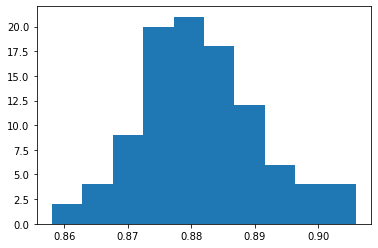

In [6]:
from matplotlib import pyplot as plt
plt.hist(prop_list,10)

In [7]:
'''
EXAMPLE 5.12
    question:
In New York City on October 23rd, 2014, a doctor who had recently been treating Ebola
patients in Guinea went to the hospital with a slight fever and was subsequently diagnosed with
Ebola. Soon thereafter, an NBC 4 New York/The Wall Street Journal/Marist Poll found that 82%
of New Yorkers favored a \mandatory 21-day quarantine for anyone who has come in contact with an
Ebola patient". This poll included responses of 1,042 New York adults between Oct 26th and 28th,
2014.
'''
n = 1042
print("PREPARE.")
print("n=",n)
phat = .82
print("phat=",phat)
print("CHECK.")
print("independence: if the poll is a simple random sample, the observations should be independent.")
print("success failure condition: ", n*phat, n*(1-phat))
print("CALCULATE.")
se = np.sqrt((phat*(1-phat)) / n)
print("standard error: ", se)
z=1.96
print("95% confidence level z score is:",z)
conf_int = (phat-(z*se), phat+(z*se))
print("CONFIDENCE INTERVAL: ", conf_int )
print('''CONCLUDE.
We're 95% confident that the proportion of NYC adults who supports 
quarantines is between {} and {}'''.format(conf_int[0],conf_int[1]))
print('''
If we took many such samples and computed a 95% confidence interval for each, then about 95% of those
intervals would contain the actual proportion of New York adults who supported a quarantine for anyone who has
come into contact with an Ebola patient.
''')


PREPARE.
n= 1042
phat= 0.82
CHECK.
independence: if the poll is a simple random sample, the observations should be independent.
success failure condition:  854.4399999999999 187.56000000000006
CALCULATE.
standard error:  0.011901708775845125
95% confidence level z score is: 1.96
CONFIDENCE INTERVAL:  (0.7966726507993435, 0.8433273492006564)
CONCLUDE.
We're 95% confident that the proportion of NYC adults who supports 
quarantines is between 0.7966726507993435 and 0.8433273492006564

If we took many such samples and computed a 95% confidence interval for each, then about 95% of those
intervals would contain the actual proportion of New York adults who supported a quarantine for anyone who has
come into contact with an Ebola patient.



In [8]:
'''
EXAMPLE 5.12
    question:
In the Pew Research poll about solar energy, they also inquired about other forms of energy, and
84.8% of the 1000 respondents supported expanding the use of wind turbines.
(a) Is it reasonable to model the proportion of US adults who support expanding wind turbines
using a normal distribution?
(b) Create a 99% confidence interval for the level of American support for expanding the use of
wind turbines for power generation.
'''
n = 1000
print("PREPARE.")
print("n=",n)
phat = .848
print("phat=",phat)
print("CHECK.")
print("independence: if the poll is a simple random sample, the observations should be independent.")
succ = n*phat
fail = n*(1-phat)
print("", succ, fail)
print("CALCULATE.")
se = np.sqrt((phat*(1-phat)) / n)
print("standard error: ", se)
z = 2.58
print("99% confidence level z score is:",z)
conf_int = (phat-(z*se), phat+(z*se))
print("CONFIDENCE INTERVAL: ", conf_int )
print('''CONCLUDE.
We're 99% confident that the proportion of NYC adults who supports 
quarantines is between {} and {}'''.format(conf_int[0],conf_int[1]))

PREPARE.
n= 1000
phat= 0.848
CHECK.
independence: if the poll is a simple random sample, the observations should be independent.
 848.0 152.00000000000003
CALCULATE.
standard error:  0.011353237423748348
99% confidence level z score is: 2.58
CONFIDENCE INTERVAL:  (0.8187086474467292, 0.8772913525532707)
CONCLUDE.
We're 99% confident that the proportion of NYC adults who supports 
quarantines is between 0.8187086474467292 and 0.8772913525532707


In [9]:
'''In 2013, the Pew Research Foundation reported that 45% of U.S. adults report
that they live with one or more chronic conditions". However, this value was based on a sample, so it may
not be a perfect estimate for the population parameter of interest on its own. The study reported a standard
error of about 1.2%, and a normal model may reasonably be used in this setting. Create a 95% confidence
interval for the proportion of U.S. adults who live with one or more chronic conditions. Also interpret the
confidence interval in the context of the study.'''

phat = .45
se=0.012
z = 1.96
conf_int = (phat-(z*se), phat+(z*se))
print("CONFIDENCE INTERVAL: ", conf_int )
print('''CONCLUDE.
We're 95% confident that the proportion of NYC adults who supports 
quarantines is between {} and {}'''.format(conf_int[0],conf_int[1]))

CONFIDENCE INTERVAL:  (0.42648, 0.47352)
CONCLUDE.
We're 95% confident that the proportion of NYC adults who supports 
quarantines is between 0.42648 and 0.47352


In [10]:
'''A poll conducted in 2013 found that 52% of U.S. adult Twitter users get
at least some news on Twitter. The standard error for this estimate was 2.4%, and a normal distribution
may be used to model the sample proportion. Construct a 99% confidence interval for the fraction of U.S.
adult Twitter users who get some news on Twitter, and interpret the confidence interval in context.'''

phat = .52
se=0.024
z = 2.58
conf_int = (phat-(z*se), phat+(z*se))
print("CONFIDENCE INTERVAL: ", conf_int )
print('''CONCLUDE.
We're 99% confident that the proportion of NYC adults who supports 
quarantines is between {} and {}'''.format(conf_int[0],conf_int[1]))

CONFIDENCE INTERVAL:  (0.45808000000000004, 0.58192)
CONCLUDE.
We're 99% confident that the proportion of NYC adults who supports 
quarantines is between 0.45808000000000004 and 0.58192


In [11]:
'''In 2013, the Pew Research Foundation reported that 45% of U.S. adults
report that they live with one or more chronic conditions", and the standard error for this estimate is 1.2%.
Identify each of the following statements as true or false. Provide an explanation to justify each of your
answers.
(a) We can say with certainty that the confidence interval from Exercise 5.7 contains the true percentage
of U.S. adults who suffer from a chronic illness.
(b) If we repeated this study 1,000 times and constructed a 95% confidence interval for each study, then
approximately 950 of those confidence intervals would contain the true fraction of U.S. adults who suffer
from chronic illnesses.
(c) The poll provides statistically significant evidence (at the a = 0.05 level) that the percentage of U.S.
adults who suffer from chronic illnesses is below 50%.
(d) Since the standard error is 1.2%, only 1.2% of people in the study communicated uncertainty about
their answer.'''
print('''
a) False. No we can't. We can't be certain because some extreme situations can always happen. We only can say:
"We're 95% confident that proportion of NYC adults who supports quarantines is between 0.42648 and 0.47352
b) True. For each 100 studies, 5 of them probably won't capture the true fraction of the population parameter.
c) True. Because the confidence interval doesn't capture 50% estimation, we can say we have statistically
significant evidence to believe it's not 50. This means that in a hypothesis test, we would reject the null 
hypothesis that the proportion is 0.5. And also it's far away from the mean by standard deviations.
d) False.
''')



a) False. No we can't. We can't be certain because some extreme situations can always happen. We only can say:
"We're 95% confident that proportion of NYC adults who supports quarantines is between 0.42648 and 0.47352
b) True. For each 100 studies, 5 of them probably won't capture the true fraction of the population parameter.
c) True. Because the confidence interval doesn't capture 50% estimation, we can say we have statistically
significant evidence to believe it's not 50. This means that in a hypothesis test, we would reject the null 
hypothesis that the proportion is 0.5. And also it's far away from the mean by standard deviations.
d) False.



In [12]:
'''Twitter users and news, Part II. A poll conducted in 2013 found that 52% of U.S. adult Twitter users
get at least some news on Twitter, and the standard error for this estimate was 2.4%. Identify each of the
following statements as true or false. Provide an explanation to justify each of your answers.
(a) The data provide statistically significant evidence that more than half of U.S. adult Twitter users get
some news through Twitter. Use a significant level of a = 0.01 (This part uses concepts from
Section 5.3 and will be corrected in a future edition.)
(b) Since the standard error is 2.4%, we can conclude that 97.6% of all U.S. adult Twitter users were
included in the study.
(c) If we want to reduce the standard error of the estimate, we should collect less data.
(d) If we construct a 90% confidence interval for the percentage of U.S. adults Twitter users who get
some news through Twitter, this confidence interval will be wider than a corresponding 99% confidence
interval.'''

print('''(a) False. We can't draw a conclusion like in that statement because (0.45808000000000004, 0.58192) is our confidence
interval and there are values less than 50% in the confidence interval.
(b) False. Standard error shows us how the average error in our sampling distribution looks like. We can't draw a conclusion
like in the statement.
(c) False. If we collect more data, we'd expect to reduce the standard error of the estimate.
(d) False. 99% confidence interval would be wider because we want to capture the correct amount so that we widen our interval.
''')

(a) False. We can't draw a conclusion like in that statement because (0.45808000000000004, 0.58192) is our confidence
interval and there are values less than 50% in the confidence interval.
(b) False. Standard error shows us how the average error in our sampling distribution looks like. We can't draw a conclusion
like in the statement.
(c) False. If we collect more data, we'd expect to reduce the standard error of the estimate.
(d) False. 99% confidence interval would be wider because we want to capture the correct amount so that we widen our interval.



In [13]:
'''5.11 Waiting at an ER, Part I. A hospital administrator hoping to improve wait times decides to estimate
the average emergency room waiting time at her hospital. She collects a simple random sample of 64 patients
and determines the time (in minutes) between when they checked in to the ER until they were first seen by
a doctor. A 95% confidence interval based on this sample is (128 minutes, 147 minutes), which is based on
the normal model for the mean. Determine whether the following statements are true or false, and explain
your reasoning.
(a) We are 95% confident that the average waiting time of these 64 emergency room patients is between
128 and 147 minutes.
(b) We are 95% confident that the average waiting time of all patients at this hospital's emergency room is
between 128 and 147 minutes.
(c) 95% of random samples have a sample mean between 128 and 147 minutes.
(d) A 99% confidence interval would be narrower than the 95% confidence interval since we need to be more
sure of our estimate.
(e) The margin of error is 9.5 and the sample mean is 137.5.
(f) In order to decrease the margin of error of a 95% confidence interval to half of what it is now, we would
need to double the sample size. (Hint: the margin of error for a mean scales in the same way with
sample size as the margin of error for a proportion.)'''

print('''
a) False. We're 95% confident that the average waiting time of all patients at the hospital is between 128 and 147 minutes.
We already know the sample mean if we had sampling and it's provided in the data already.
b) True.
c) False. It's not about sample mean, it's about population parameter.
d) False. 99% confidence interval would be wider because we want to capture the correct amount so that we widen our interval.
e) True. 147 - 128 = 19 / 2 = 9.5 + 128 = 137.5
f) Margin of error: (z* x SE) so the z is same because it's given 95%. It's about SE and the way to cut the SE in half is
sqrt(p(1-p)/n). if we double the sample size it's not enough. we have to do it 4 times because of the square root in the formula
''')


a) False. We're 95% confident that the average waiting time of all patients at the hospital is between 128 and 147 minutes.
We already know the sample mean if we had sampling and it's provided in the data already.
b) True.
c) False. It's not about sample mean, it's about population parameter.
d) False. 99% confidence interval would be wider because we want to capture the correct amount so that we widen our interval.
e) True. 147 - 128 = 19 / 2 = 9.5 + 128 = 137.5
f) Margin of error: (z* x SE) so the z is same because it's given 95%. It's about SE and the way to cut the SE in half is
sqrt(p(1-p)/n). if we double the sample size it's not enough. we have to do it 4 times because of the square root in the formula



In [14]:
'''5.12 Mental health. The General Social Survey asked the question: \For how many days during the past
30 days was your mental health, which includes stress, depression, and problems with emotions, not good?"
Based on responses from 1,151 US residents, the survey reported a 95% confidence interval of 3.40 to 4.24
days in 2010.
(a) Interpret this interval in context of the data.
(b) What does 95% confident" mean? Explain in the context of the application.
(c) Suppose the researchers think a 99% confidence level would be more appropriate for this interval. Will
this new interval be smaller or wider than the 95% confidence interval?
(d) If a new survey were to be done with 500 Americans, do you think the standard error of the estimate
be larger, smaller, or about the same.'''

print('''(a) We're 95% confident that the percentage of US residents who doesn't feel alright mentally in 50 days
is between 3.40 and 4.24.
(b) 95% confident means how plausible the range is for the population parameter. We're 95% sure
that the percentage of US residents who doesn't feel alright mentally in 50 days is between 3.40 and 4.24.
(c) Wider. 
(d) Because the respondents decrease, I expect standard error to be larger.
''')


(a) We're 95% confident that the percentage of US residents who doesn't feel alright mentally in 50 days
is between 3.40 and 4.24.
(b) 95% confident means how plausible the range is for the population parameter. We're 95% sure
that the percentage of US residents who doesn't feel alright mentally in 50 days is between 3.40 and 4.24.
(c) Wider. 
(d) Because the respondents decrease, I expect standard error to be larger.



In [15]:
'''5.13 Website registration. A website is trying to increase registration for first-time visitors, exposing 1%
of these visitors to a new site design. Of 752 randomly sampled visitors over a month who saw the new
design, 64 registered.
(a) Check any conditions required for constructing a confidence interval.
(b) Compute the standard error.
(c) Construct and interpret a 90% confidence interval for the fraction of first-time visitors of the site who
would register under the new design (assuming stable behaviors by new visitors over time).'''

print('''(a) independence: if users are randomly assigned, condition met.
success-failure condition: 64 and 752-64 = 688 is both greater than 10.
(b) SE = sqrt(p(1-p) / n) = sqrt(0.0778 / 752) = 0.01017
(c) 90% confidence z* = 1.645
phat = {phat}
margin of error: 1.645 * 0.01017 = {me}
confidence interval: (0.08510 - {me} ,  0.08510 + {me}) = ({lo},{hi})
'''.format(phat=64/752,me=(1.645 * 0.01017),lo= 0.085 - (1.645 * 0.01017),hi= 0.085 + (1.645 * 0.01017)))

(a) independence: if users are randomly assigned, condition met.
success-failure condition: 64 and 752-64 = 688 is both greater than 10.
(b) SE = sqrt(p(1-p) / n) = sqrt(0.0778 / 752) = 0.01017
(c) 90% confidence z* = 1.645
phat = 0.0851063829787234
margin of error: 1.645 * 0.01017 = 0.016729650000000002
confidence interval: (0.08510 - 0.016729650000000002 ,  0.08510 + 0.016729650000000002) = (0.06827035000000001,0.10172965)



In [16]:
'''5.14 Coupons driving visits. A store randomly samples 603 shoppers over the course of a year and
finds that 142 of them made their visit because of a coupon they'd received in the mail. Construct a 95%
confidence interval for the fraction of all shoppers during the year whose visit was because of a coupon they'd
received in the mail.'''
n = 603
succ = 142
phat = succ/n
minus_phat = 1-(succ/n)
z = 1.96
se = np.sqrt(phat*minus_phat / n)
me= 1.96 * se
lo = phat - me
hi = phat + me
print('''(a) n = {n} , phat = {phat}, 1-phat = {minus_phat}
SE = sqrt(p(1-p)/n) = sqrt(({phat}*{minus_phat})/{n}) = {se}
z* = {z} , margin of error: z* x SE = {me}
confidence interval: (phat - z* x SE , phat + z* x SE) = ({lo},{hi})
'''.format(n=n,z=z,phat=phat, minus_phat= minus_phat, se = se, me = me, lo=lo, hi=hi))


(a) n = 603 , phat = 0.23548922056384744, 1-phat = 0.7645107794361525
SE = sqrt(p(1-p)/n) = sqrt((0.23548922056384744*0.7645107794361525)/603) = 0.01727900246846652
z* = 1.96 , margin of error: z* x SE = 0.03386684483819438
confidence interval: (phat - z* x SE , phat + z* x SE) = (0.20162237572565306,0.2693560654020418)



In [17]:
rosling = pd.read_csv("../openintro_stats/data/rosling_responses.csv")
first_question = rosling[rosling["question"] == "children_with_1_or_more_vaccination"]["response"]
print(first_question.value_counts(normalize=True))
# rosling's responses dataset tells us in the poll, 24% of the people who attended at the poll
# correctly guessed the answer of the question. but we need to find out if that result is
# statistically significant or was it just due to chance. If it's not by chance, we can state
# that the data provide strong evidence against the null hypothesis and we reject H0.
n = first_question.count()
phat = first_question.value_counts(normalize=True)["correct"]
minus_phat = 1 - phat
z = 1.96 # for the 95% significance level.
se = np.sqrt(phat*minus_phat / n)
me= z * se
lo = phat - me
hi = phat + me
print('''n = {n} , phat = {phat}, 1-phat = {minus_phat}
SE = sqrt(p(1-p)/n) = sqrt(({phat}*{minus_phat})/{n}) = {se}
z* = {z} , margin of error: z* x SE = {me}
confidence interval: (phat - z* x SE , phat + z* x SE) = ({lo},{hi}
Because our p0 -null value- is within the range of our confidence interval that we built for
24% correct guess rate; we can't say that the null hypothesis is implausible.
the data do not provide sufficient evidence to reject the notion that the performance of college 
educated adults was different than random guessing, and we do not reject the null hypothesis, H0.)
'''.format(n=n,z=z,phat=phat, minus_phat= minus_phat, se = se, me = me, lo=lo, hi=hi))

incorrect    0.76
correct      0.24
Name: response, dtype: float64
n = 50 , phat = 0.24, 1-phat = 0.76
SE = sqrt(p(1-p)/n) = sqrt((0.24*0.76)/50) = 0.060398675482166
z* = 1.96 , margin of error: z* x SE = 0.11838140394504536
confidence interval: (phat - z* x SE , phat + z* x SE) = (0.12161859605495463,0.35838140394504536
Because our p0 -null value- is within the range of our confidence interval that we built for
24% correct guess rate; we can't say that the null hypothesis is implausible.
the data do not provide sufficient evidence to reject the notion that the performance of college 
educated adults was different than random guessing, and we do not reject the null hypothesis, H0.)



In [18]:
second_question = rosling[rosling["question"] == "children_in_2100"]["response"]
print(second_question.value_counts(normalize=True))
n = second_question.count()
phat = second_question.value_counts(normalize=True)["correct"]
minus_phat = 1 - phat
z = 1.96 # for the 95% significance level.
se = np.sqrt(phat*minus_phat / n)
me= z * se
lo = phat - me
hi = phat + me
print('''n = {n} , phat = {phat}, 1-phat = {minus_phat}
SE = sqrt(p(1-p)/n) = sqrt(({phat}*{minus_phat})/{n}) = {se}
z* = {z} , margin of error: z* x SE = {me}
confidence interval: (phat - z* x SE , phat + z* x SE) = ({lo},{hi})
#H0: the proportion who get the answer correct is the same as random guessing: 1-in-3, or p = 0.333
#HA: the proportion who get the answer correct is different than random guessing, p =! 0.333
Because our p0 -null value- IS NOT within the range of our confidence interval that we built for
15% correct guess rate; we can't say that the null hypothesis is implausible.
the data DOES provide sufficient evidence to reject H0.
Educated adults was different than random guessing, and we REJECT the null hypothesis, H0 in favor of alternative, HA.)
'''.format(n=n,z=z,phat=phat, minus_phat= minus_phat, se = se, me = me, lo=lo, hi=hi))

incorrect    0.850877
correct      0.149123
Name: response, dtype: float64
n = 228 , phat = 0.14912280701754385, 1-phat = 0.8508771929824561
SE = sqrt(p(1-p)/n) = sqrt((0.14912280701754385*0.8508771929824561)/228) = 0.023590549275261954
z* = 1.96 , margin of error: z* x SE = 0.04623747657951343
confidence interval: (phat - z* x SE , phat + z* x SE) = (0.10288533043803041,0.1953602835970573)
#H0: the proportion who get the answer correct is the same as random guessing: 1-in-3, or p = 0.333
#HA: the proportion who get the answer correct is different than random guessing, p =! 0.333
Because our p0 -null value- IS NOT within the range of our confidence interval that we built for
15% correct guess rate; we can't say that the null hypothesis is implausible.
the data DOES provide sufficient evidence to reject H0.
Educated adults was different than random guessing, and we REJECT the null hypothesis, H0 in favor of alternative, HA.)



In [19]:
print('''5.15
a)
H0: there are no majority or minority of the students' performance improved p = 0.5
HA: there are majority or minority of the students' performance improved p != 0.5
b) 
H0: there is no difference in the company's employee productivity in March Madness than usual, p = 15
HA: there is difference in the company's employee productivity in March Madness than usual, p != 15
''',
'''
5.16
a) firstly, we don't know about the sample size here. it's an important discussion since we have additional steps
to follow when evaluating inference from a poll. but that being a random sample checks the independence condition.
H0: average calorie intake of diners in a restaurant didn't change. p = 1100
HA: average calorie intake of diners in a restaurant changed. p != 1100
b) independence condition has met. success-failure condition has met.
H0: there's no real difference in alcohol consumption rate between the whole nation and wisconsin. p = .70
HA: there's significant difference in alcohol consumption rate between the whole nation and wisconsin. p != .70
''')



5.15
a)
H0: there are no majority or minority of the students' performance improved p = 0.5
HA: there are majority or minority of the students' performance improved p != 0.5
b) 
H0: there is no difference in the company's employee productivity in March Madness than usual, p = 15
HA: there is difference in the company's employee productivity in March Madness than usual, p != 15
 
5.16
a) firstly, we don't know about the sample size here. it's an important discussion since we have additional steps
to follow when evaluating inference from a poll. but that being a random sample checks the independence condition.
H0: average calorie intake of diners in a restaurant didn't change. p = 1100
HA: average calorie intake of diners in a restaurant changed. p != 1100
b) independence condition has met. success-failure condition has met.
H0: there's no real difference in alcohol consumption rate between the whole nation and wisconsin. p = .70
HA: there's significant difference in alcohol consumption 

In [20]:
print('''
5.17
while conducting the hypothesis test, we have to build two competing ideas. our hypotheses should be like following;
H0: the true proportion of college students who spend 10+ hourspweek for online communication is same as the study / p = .60
HA: the true proportion of college students who spend 10+ hourspweek for online communication is not same as the study / p != .60
'''
,
'''
5.18
the hypothesis test is about the population, we shouldn't build them with the sample proportion we'll test the
sample proportion, not building hypotheses with it. has to be built with .25, not .24 since .24 is our sample proportion
H0: the real proportion of 25yr olds have gotten married is no different than the study. p = .25
HA: the real proportion of 25yr olds have gotten married is different than the study. p != .25
''')


5.17
while conducting the hypothesis test, we have to build two competing ideas. our hypotheses should be like following;
H0: the true proportion of college students who spend 10+ hourspweek for online communication is same as the study / p = .60
HA: the true proportion of college students who spend 10+ hourspweek for online communication is not same as the study / p != .60
 
5.18
the hypothesis test is about the population, we shouldn't build them with the sample proportion we'll test the
sample proportion, not building hypotheses with it. has to be built with .25, not .24 since .24 is our sample proportion
H0: the real proportion of 25yr olds have gotten married is no different than the study. p = .25
HA: the real proportion of 25yr olds have gotten married is different than the study. p != .25



In [21]:
print('''5.19
a) yes. the claim is supported by the confidence interval since in our 95% confidence interval there's not the value %50.
this basically says: "we're 95% confident that the true proportion is between 54-64%, there are always a majority."
b) no. this confidence interval does not support this conjecture since %70 is out of our confidence interval.
c) no. increasing the significance level would narrow the confidence interval. because when we increase significance
from .05 to .10, we're updating our acceptance limit for an "incredibly occurring event". we state some more likely 
occurring events are unacceptable for us. because the confidence interval not covering the area of 70%, increasing the
significance level won't help, actually it'll go to the opposite direction so that claim won't be supported if we don't
choose a smaller significance level such as .01

''',
'''
5.20
a) this is unsupported because the claim isn't supported by our confidence interval.
b) 132 minutes are in the confidence interval. this claim is supported.
c) yes. because it's already in the confidence interval and when we decrease our sigificance level the confidence interval
will not be narrower, that means it will still be within the confidence interval in that condition. no problem.
''')

5.19
a) yes. the claim is supported by the confidence interval since in our 95% confidence interval there's not the value %50.
this basically says: "we're 95% confident that the true proportion is between 54-64%, there are always a majority."
b) no. this confidence interval does not support this conjecture since %70 is out of our confidence interval.
c) no. increasing the significance level would narrow the confidence interval. because when we increase significance
from .05 to .10, we're updating our acceptance limit for an "incredibly occurring event". we state some more likely 
occurring events are unacceptable for us. because the confidence interval not covering the area of 70%, increasing the
significance level won't help, actually it'll go to the opposite direction so that claim won't be supported if we don't
choose a smaller significance level such as .01

 
5.20
a) this is unsupported because the claim isn't supported by our confidence interval.
b) 132 minutes are in the confide

In [22]:
'''5.21 Minimum wage, Part I. 
Do a majority of US adults believe raising the minimum wage will help the economy, or is there a majority who do not 
believe this? A Rasmussen Reports survey of 1,000 US adults found that 42% believe it will help the economy.
Conduct an appropriate hypothesis test to help answer the research question.'''
n = 1000
p0 = .5
minus_p = 1 - p0
phat = .42
succ = p0 * n
fail = minus_p * n
se = np.sqrt(p0*minus_p / n) # calculate standard error for null value p0
z = (phat-p0)/se # how many standard errors away the phat is from the null value in the null distribution
pvalue = scipy.stats.norm.sf(abs(z))*2 #find p-value for two-tailed test

print('''(a) n = {n} , p0 = {p0}, phat = {phat}, 1-phat = {minus_p}
- independence condition satisfied since the poll is randomly sampled.
- success-failure condition: p0 *n = {succ}, p0 * n = {fail} // satisfied.
H0: there is no majority of US adults who believe raising the minimum wage will help the economy. p = 0.5
HA: there is a majority of US adults who believe raising the minimum wage will help the economy. p != 0.5
SE = sqrt(p(1-p)/n) = sqrt(({p0}*{minus_p})/{n}) = {se} // we use the p0 for the null distribution
z* = {z}
p-value = {pvalue}
since our p value is so little that less than .05 or even .01 significance level, we can reject the null hypothesis
and conclude there's a majority in US adults believing raising minimum wage will help economy.
'''.format(n=n,p0=p0,phat=phat, minus_p= minus_p, succ=succ, fail=fail, se = se,z=z,pvalue=format(pvalue, '.8f')))

(a) n = 1000 , p0 = 0.5, phat = 0.42, 1-phat = 0.5
- independence condition satisfied since the poll is randomly sampled.
- success-failure condition: p0 *n = 500.0, p0 * n = 500.0 // satisfied.
H0: there is no majority of US adults who believe raising the minimum wage will help the economy. p = 0.5
HA: there is a majority of US adults who believe raising the minimum wage will help the economy. p != 0.5
SE = sqrt(p(1-p)/n) = sqrt((0.5*0.5)/1000) = 0.015811388300841896 // we use the p0 for the null distribution
z* = -5.059644256269408
p-value = 0.00000042
since our p value is so little that less than .05 or even .01 significance level, we can reject the null hypothesis
and conclude there's a majority in US adults believing raising minimum wage will help economy.



In [51]:
'''5.22 Getting enough sleep. 
400 students were randomly sampled from a large university, and 289 said they did not get enough sleep. 
Conduct a hypothesis test to check whether this represents a statistically significant difference from 50%, 
and use a significance level of 0.01.'''
n = 400
p0 = .5
minus_p = 1 - p0
enough = 289
phat = enough / n
succ = p0 * n
fail = minus_p * n
se = np.sqrt(p0*minus_p / n) # calculate standard error for null value p0
z = (phat-p0)/se # how many standard errors away the phat is from the null value in the null distribution
pvalue = scipy.stats.norm.sf(abs(z))*2 # find p-value for two-tailed test

print('''(a) n = {n} , p0 = {p0}, phat = {phat}, 1-p0 = {minus_p}
- independence condition satisfied since the poll is randomly sampled.
- success-failure condition: p0 * n = {succ}, (1-p0) * n = {fail} // satisfied.
H0: there's no majority of students who do not get enough sleep. p = 0.5
HA: there's a majority of students who do not get enough sleep. p != 0.5
SE = sqrt(p(1-p)/n) = sqrt(({p0}*{minus_p})/{n}) = {se} // we use the p0 for the null distribution
z* = {z}
p-value = {pvalue}
since our p value is so little that less than .01 significance level, we can reject the null hypothesis
and conclude there's actually a majority of students who do not get enough sleep in that university. and
our point estimate shows a higher proportion in favor of the ones that dont get enough sleep.
'''.format(n=n,p0=p0,phat=phat, minus_p= minus_p, succ=succ, fail=fail, se = se,z=z,pvalue=format(pvalue, '.20f')))

(a) n = 400 , p0 = 0.5, phat = 0.7225, 1-p0 = 0.5
- independence condition satisfied since the poll is randomly sampled.
- success-failure condition: p0 * n = 200.0, (1-p0) * n = 200.0 // satisfied.
H0: there's no majority of students who do not get enough sleep. p = 0.5
HA: there's a majority of students who do not get enough sleep. p != 0.5
SE = sqrt(p(1-p)/n) = sqrt((0.5*0.5)/400) = 0.025 // we use the p0 for the null distribution
z* = 8.9
p-value = 0.00000000000000000056
since our p value is so little that less than .01 significance level, we can reject the null hypothesis
and conclude there's actually a majority of students who do not get enough sleep in that university. and
our point estimate shows a higher proportion in favor of the ones that dont get enough sleep.



In [24]:
'''5.23 Working backwards, Part I. 
You are given the following hypotheses:
H0 : p = 0.3
HA : p != 0.3
We know the sample size is 90. For what sample proportion would the p-value be equal to 0.05? Assume
that all conditions necessary for inference are satisfied.'''
n = 90
p0 = .3
minus_p = 1 - p0
se = np.sqrt(p0*minus_p / n) # calculate standard error for null value p0
z = 1.96 # p value equals .05 means 1.96 standard deviations away
phat = z * se + p0

print(''' phat = {phat}
'''.format(phat=phat))

 phat = 0.394676994741771



In [25]:
'''5.24 Working backwards, Part II. 
You are given the following hypotheses:
H0 : p = 0.9
HA : p != 0.9
We know that the sample size is 1,429. For what sample proportion would the p-value be equal to 0.01?
Assume that all conditions necessary for inference are satisfied.'''
n = 1429
p0 = .9
minus_p = 1 - p0
se = np.sqrt(p0*minus_p / n) # calculate standard error for null value p0
z = 2.58 # p value equals .01 means 2.58 standard deviations away
phat = z * se + p0

print(''' phat = {phat}
'''.format(phat=phat))

 phat = 0.9204750441213314



In [26]:
'''5.25 Testing for Fibromyalgia. A patient named Diana was diagnosed with Fibromyalgia, a long-term
syndrome of body pain, and was prescribed anti-depressants. Being the skeptic that she is, Diana didn't
initially believe that anti-depressants would help her symptoms. However after a couple months of being on
the medication she decides that the anti-depressants are working, because she feels like her symptoms are
in fact getting better.
(a) Write the hypotheses in words for Diana's skeptical position when she started taking the anti-depressants.
(b) What is a Type 1 Error in this context?
(c) What is a Type 2 Error in this context?'''

print('''
H0: there's no significant difference between using anti-depressants or not.
HA: theres a significant difference between using anti-depressants or not.
Type 1 Error: concluding that there's some real difference in whether using the anti-depressants or not while there isn't
Type 2 Error: concluding that there's no real difference in whether using the anti-depressants or not while there is
''')




H0: there's no significant difference between using anti-depressants or not.
HA: theres a significant difference between using anti-depressants or not.
Type 1 Error: concluding that there's some real difference in whether using the anti-depressants or not while there isn't
Type 2 Error: concluding that there's no real difference in whether using the anti-depressants or not while there is



In [27]:
'''5.26 Which is higher? In each part below, there is a value of interest and two scenarios (I and II). For
each part, report if the value of interest is larger under scenario I, scenario II, or whether the value is equal
under the scenarios.
(a) The standard error of phat when (I) n = 125 or (II) n = 500.
(b) The margin of error of a confidence interval when the confidence level is (I) 90% or (II) 80%.
(c) The p-value for a Z-statistic of 2.5 calculated based on a (I) sample with n = 500 or based on a (II) sample
with n = 1000.
(d) The probability of making a Type 2 Error when the alternative hypothesis is true and the significance
level is (I) 0.05 or (II) 0.10.'''
print('''5.26
a) scenario (I) is larger
b) since me= z * se, and in two scenarios standard error remains the same, the one that has bigger z-score will be larger.
higher confidence level means higher z-score because we widen our expectations for a valid value. bigger z-score means
bigger margin of error. so scenario (I) is larger.
c) two scenarios are the same. p-value for a z-score doesn't change in the normal distribution.
d) lower significance level means higher type 2 error rate.
''')

5.26
a) scenario (I) is larger
b) since me= z * se, and in two scenarios standard error remains the same, the one that has bigger z-score will be larger.
higher confidence level means higher z-score because we widen our expectations for a valid value. bigger z-score means
bigger margin of error. so scenario (I) is larger.
c) two scenarios are the same. p-value for a z-score doesn't change in the normal distribution.
d) lower significance level means higher type 2 error rate.



In [28]:
'''5.27 Relaxing after work. The General Social Survey asked the question: "After an average work day,
about how many hours do you have to relax or pursue activities that you enjoy?" to a random sample of
1,155 Americans. A 95% confidence interval for the mean number of hours spent relaxing or pursuing
activities they enjoy was (1.38, 1.92).
(a) Interpret this interval in context of the data.
(b) Suppose another set of researchers reported a confidence interval with a larger margin of error based on
the same sample of 1,155 Americans. How does their confidence level compare to the confidence level
of the interval stated above?
(c) Suppose next year a new survey asking the same question is conducted, and this time the sample size
is 2,500. Assuming that the population characteristics, with respect to how much time people spend
relaxing after work, have not changed much within a year. How will the margin of error of the 95%
confidence interval constructed'''
print('''5.27
a) We're 95% confident that the real mean of the relaxation time of Americans is between 1.23 and 1.92  
b) It should be larger than the confidence interval stated above. Because the bigger margin of error the bigger confidence interval is.
c) since the sample size increases, the standard error decreases, margin of error decreases too.
''')

5.27
a) We're 95% confident that the real mean of the relaxation time of Americans is between 1.23 and 1.92  
b) It should be larger than the confidence interval stated above. Because the bigger margin of error the bigger confidence interval is.
c) since the sample size increases, the standard error decreases, margin of error decreases too.



In [32]:
'''5.28 Minimum wage, Part II. In Exercise 5.21, we learned that a Rasmussen Reports survey of 1,000 US
adults found that 42% believe raising the minimum wage will help the economy. Construct a 99% confidence
interval for the true proportion of US adults who believe this.'''
n = 1000
phat = .42
minus_phat = 1 - phat
z = 2.58 # for the 99% significance level.
se = np.sqrt(phat*minus_phat / n)
me = z * se
lo = phat - me
hi = phat + me
print('''5.28
n = {n} , phat = {phat}, 1-phat = {minus_phat}
SE = sqrt(p(1-p)/n) = sqrt(({phat}*{minus_phat})/{n}) = {se}
z* = {z} , margin of error: z* x SE = {me}
confidence interval: (phat - z* x SE , phat + z* x SE) = ({lo},{hi})
'''.format(n=n,z=z,phat=phat, minus_phat= minus_phat, se = se, me = me, lo=lo, hi=hi))

5.28
n = 1000 , phat = 0.42, 1-phat = 0.5800000000000001
SE = sqrt(p(1-p)/n) = sqrt((0.42*0.5800000000000001)/1000) = 0.015607690412101338
z* = 2.58 , margin of error: z* x SE = 0.04026784126322145
confidence interval: (phat - z* x SE , phat + z* x SE) = (0.3797321587367785,0.46026784126322146)



In [47]:
'''5.29 Testing for food safety. A food safety inspector is called upon to investigate a restaurant with a few
customer reports of poor sanitation practices. The food safety inspector uses a hypothesis testing framework
to evaluate whether regulations are not being met. If he decides the restaurant is in gross violation, its license
to serve food will be revoked.
(a) Write the hypotheses in words.
(b) What is a Type 1 Error in this context?
(c) What is a Type 2 Error in this context?
(d) Which error is more problematic for the restaurant owner? Why?
(e) Which error is more problematic for the diners? Why?
(f) As a diner, would you prefer that the food safety inspector requires strong evidence or very strong
evidence of health concerns before revoking a restaurant's license? Explain your reasoning.'''

print('''5.29
a) 
H0: the restaurant does comply the regulations necessary
HA: the restaurant does not comply the regulations necessary
b) type 1 error is rejecting the H0 while H0 is true. in this case, while the restaurant fits the rules necessary,
if the inspector concludes that it's not, that's a type 1 error.
c) type 2 error is not rejecting the H0 while the alternative is true. in this case, while the restaurant is in gross
violation, if the inspector concludes they're not; this is a type 2 error.
d) for the restaurant owner, it's more problematic if the inspector makes a type 1 error because in that scenario
his restaurant's license will be revoked.
e) for the diners, type 2 error is more problematic. Because in that scenario, they will continue eating food
that isn't hygienic without knowing it is. 
f) if i were a diner there, i would prefer the inspector embrace the strong evidence rule. i wouldn't set a high
standard to revoke the license so that in case  the restaurant is having some rare-occurring events that are not 
hygienic, that wouldn't be acceptable and they can not move on.
''')


5.29
a) 
H0: the restaurant does comply the regulations necessary
HA: the restaurant does not comply the regulations necessary
b) type 1 error is rejecting the H0 while H0 is true. in this case, while the restaurant fits the rules necessary,
if the inspector concludes that it's not, that's a type 1 error.
c) type 2 error is not rejecting the H0 while the alternative is true. in this case, while the restaurant is in gross
violation, if the inspector concludes they're not; this is a type 2 error.
d) for the restaurant owner, it's more problematic if the inspector makes a type 1 error because in that scenario
his restaurant's license will be revoked.
e) for the diners, type 2 error is more problematic. Because in that scenario, they will continue eating food
that isn't hygienic without knowing it is. 
f) if i were a diner there, i would prefer the inspector embrace the strong evidence rule. i wouldn't set a high
standard to revoke the license so that in case  the restaurant is having some

In [48]:
'''5.30 True or false. Determine if the following statements are true or false, and explain your reasoning. If
false, state how it could be corrected.
(a) If a given value (for example, the null hypothesized value of a parameter) is within a 95% confidence
interval, it will also be within a 99% confidence interval.
(b) Decreasing the significance level (alpha) will increase the probability of making a Type 1 Error.
(c) Suppose the null hypothesis is p = 0.5 and we fail to reject H0. Under this scenario, the true population
proportion is 0.5.
(d) With large sample sizes, even small differences between the null value and the observed point estimate,
a difference often called the effect size, will be identified as statistically significant.'''

print('''5.30
a) true. because the confidence interval after setting a bigger confidence level will be larger and the given value
is already in the confidence interval, it'll stay within the interval.
b) false. because when we choose a smaller significance level we demand very strong evidence favoring HA, we want 
to be very cautious about rejecting the null hypothesis. this will result with a lower type 1 error probability.
c) false. while we say we failed to reject the H0, we don't automatically accept H0.
d) true. because the margin of error scales with standard error and standard error decreases when n is bigger,
bigger sample sizes will result with a smaller confidence interval.
''')

5.30
a) true. because the confidence interval after setting a bigger confidence level will be larger and the given value
is already in the confidence interval, it'll stay within the interval.
b) false. because when we choose a smaller significance level we demand very strong evidence favoring HA, we want 
to be very cautious about rejecting the null hypothesis. this will result with a lower type 1 error probability.
c) false. while we say we failed to reject the H0, we don't automatically accept H0.
d) true. because the margin of error scales with standard error and standard error decreases when n is bigger,
bigger sample sizes will result with a smaller confidence interval.



In [49]:
'''5.31 Unemployment and relationship problems. A USA Today/Gallup poll asked a group of unemployed
and underemployed Americans if they have had major problems in their relationships with their spouse or
another close family member as a result of not having a job (if unemployed) or not having a full-time job (if
underemployed). 27% of the 1,145 unemployed respondents and 25% of the 675 underemployed respondents
said they had major problems in relationships as a result of their employment status.
(a) What are the hypotheses for evaluating if the proportions of unemployed and underemployed people
who had relationship problems were different?
(b) The p-value for this hypothesis test is approximately 0.35. Explain what this means in context of the
hypothesis test and the data.'''
print('''5.31
a) 
H0: the real proportion of having major problems in their relationships between unemployed and underemployed 
people in US are equal. p_unemployed = p_underemployed
HA: the real proportion of having major problems in their relationships between unemployed and underemployed 
people in US aren't equal. p_unemployed != p_underemployed
b) for example at a 95% confidence level with a p-value of 0.35, we fail reject the H0 since the p value is too big. 
we can conclude the data doesn't provide a convincing evidence that the unemployed and underemployed people who are 
having relationship problems are different.
''')

5.31
a) 
H0: the real proportion of having major problems in their relationships between unemployed and underemployed 
people in US are equal. p_unemployed = p_underemployed
HA: the real proportion of having major problems in their relationships between unemployed and underemployed 
people in US aren't equal. p_unemployed != p_underemployed
b) for example at a 95% confidence level with a p-value of 0.35, we fail reject the H0 since the p value is too big. 
we can conclude the data doesn't provide a convincing evidence that the unemployed and underemployed people who are 
having relationship problems are different.



In [61]:
'''5.32 Nearsighted. It is believed that nearsightedness affects about 8% of all children. In a random sample
of 194 children, 21 are nearsighted. Conduct a hypothesis test for the following question: do these data
provide evidence that the 8% value is inaccurate?'''
n = 194
p0 = .08
minus_p = 1 - p0
nearsight = 21
phat = nearsight / n
succ = p0 * n
fail = minus_p * n
se = np.sqrt(p0*minus_p / n) # calculate standard error for null value p0
z = (phat-p0)/se # how many standard errors away the phat is from the null value in the null distribution
pvalue = scipy.stats.norm.sf(abs(z))*2 # find p-value for two-tailed test

print('''(a) n = {n} , p0 = {p0}, phat = {phat}, 1-p0 = {minus_p}
H0: the nearsightedness rate in all children is equal to 0.08. p = 0.08
HA: the nearsightedness rate in all children isn't equal to 0.08. p != 0.08
- independence condition satisfied since the poll is randomly sampled.
- success-failure condition: p0 * n = {succ}, (1-p0) * n = {fail} // satisfied.
SE = sqrt(p(1-p)/n) = sqrt(({p0}*{minus_p})/{n}) = {se} // we use the p0 for the null distribution
z* = {z}
p-value = {pvalue}
since the p value is too high, we can not reject the null hypothesis and conclude the data does not provide a 
convincing evidence against the H0. we can't say %8 rate is inaccurate.
'''.format(n=n,p0=p0,phat=phat, minus_p= minus_p, succ=succ, fail=fail, se = se,z=z,pvalue=format(pvalue, '.20f')))

(a) n = 194 , p0 = 0.08, phat = 0.10824742268041238, 1-p0 = 0.92
H0: the nearsightedness rate in all children is equal to 0.08. p = 0.08
HA: the nearsightedness rate in all children isn't equal to 0.08. p != 0.08
- independence condition satisfied since the poll is randomly sampled.
- success-failure condition: p0 * n = 15.52, (1-p0) * n = 178.48000000000002 // satisfied.
SE = sqrt(p(1-p)/n) = sqrt((0.08*0.92)/194) = 0.019477716583289967 // we use the p0 for the null distribution
z* = 1.4502430282123513
p-value = 0.14699076003690414449
since the p value is too high, we can not reject the null hypothesis and conclude the data does not provide a 
convincing evidence against the H0. we can't say %8 rate is inaccurate.



In [55]:
'''5.33 Nutrition labels. The nutrition label on a bag of potato chips says that a one ounce (28 gram) serving
of potato chips has 130 calories and contains ten grams of fat, with three grams of saturated fat. A random
sample of 35 bags yielded a confidence interval for the number of calories per bag of 128.2 to 139.8 calories.
Is there evidence that the nutrition label does not provide an accurate measure of calories in the bags of
potato chips?'''
print('''5.33
no. because the value (130) is in the confidence interval, we can not say there's convincing evidence in the data
that the true average is different than what the nutrition label suggests.
''')

5.33
no. because the value (130) is in the confidence interval, we can not say there's convincing evidence in the data
that the true average is different than what the nutrition label suggests.



In [54]:
'''5.34 CLT for proportions. Define the term "sampling distribution" of the sample proportion, and describe
how the shape, center, and spread of the sampling distribution change as the sample size increases when
p = 0.1.'''
print('''5.34
sampling distribution is a distribution for sample proportions. it contains how frequently we'll encounter samples
or the probability of a sample to be seen. if we increase the sample size the center of the distribution remains
same with the sample proportion. the shape would be more continuous, and because the sample size increases 
there will be a lower standard error which causes a narrower spread.  
''')

5.34
sampling distribution is a distribution for sample proportions. it contains how frequently we'll encounter samples
or the probability of a sample to be seen. if we increase the sample size the center of the distribution remains
same with the sample proportion. the shape would be more continuous, and because the sample size increases 
there will be a lower standard error which causes a narrower spread.  



In [57]:
'''5.35 Practical vs. statistical significance. Determine whether the following statement is true or false,
and explain your reasoning: "With large sample sizes, even small differences between the null value and the
observed point estimate can be statistically significant." '''
print('''5.35
true. because if the sample size gets larger standard error will be smaller. this causes a more little confidence
interval then we'll be talking about some smaller differences to be not significant. our spread will be narrower. 
''')

5.35
true. because if the sample size gets larger standard error will be smaller. this causes a more little confidence
interval then we'll be talking about some smaller differences to be not significant. our spread will be narrower. 



In [62]:
'''5.36 Same observation, different sample size. Suppose you conduct a hypothesis test based on a sample
where the sample size is n = 50, and arrive at a p-value of 0.08. You then refer back to your notes and
discover that you made a careless mistake, the sample size should have been n = 500. Will your p-value
increase, decrease, or stay the same? Explain.'''
print('''5.36
p-value will be smaller. because with a bigger sample size, standard error will decrease and the z-value will
be higher. because there will be a p-value that corresponds to a bigger z-value, probability in a less likely
occurring event in the sampling distribution will be smaller.
''')

5.36
p-value will be smaller. because with a bigger sample size, standard error will decrease and the z-value will
be higher. because there will be a p-value that corresponds to a bigger z-value, probability in a less likely
occurring event in the sampling distribution will be smaller.



In [73]:
'''5.37 Gender pay gap in medicine. A study examined the average pay for men and women entering the
workforce as doctors for 21 different positions.
(a) If each gender was equally paid, then we would expect about half of those positions to have men paid
more than women and women would be paid more than men in the other half of positions. Write
appropriate hypotheses to test this scenario.
(b) Men were, on average, paid more in 19 of those 21 positions. Complete a hypothesis test using your
hypotheses from part (a).'''

n = 21
p0 = .5
minus_p = 1 - p0
men_higher = 19
phat = men_higher / n
succ = p0 * n
fail = minus_p * n
se = np.sqrt(p0*minus_p / n) # calculate standard error for null value p0
z = (phat-p0)/se # how many standard errors away the phat is from the null value in the null distribution
pvalue = scipy.stats.norm.sf(abs(z))*2 # find p-value for two-tailed test

print('''n = {n} , p0 = {p0}, phat = {phat}, 1-p0 = {minus_p}
H0: there's no difference in the real fraction of cases where men are paid more than women.
HA: there's a difference in the real fraction of cases where men are paid more than women.
- independence condition satisfied since the poll is randomly sampled.
- success-failure condition: p0 * n = {succ}, (1-p0) * n = {fail} // satisfied.
SE = sqrt(p(1-p)/n) = sqrt(({p0}*{minus_p})/{n}) = {se} // we use the p0 for the null distribution
z* = {z}
p-value = {pvalue}
since the p-value is smaller than .05, we can reject the H0 and conclude there's a convincing evidence in the data
in favor of HA, there's a real difference between salaries of men and women.
'''.format(n=n,p0=p0,phat=phat, minus_p= minus_p, succ=succ, fail=fail, se = se,z=z,pvalue=format(pvalue, '.6f')))

n = 21 , p0 = 0.5, phat = 0.9047619047619048, 1-p0 = 0.5
H0: there's no difference in the real fraction of cases where men are paid more than women.
HA: there's a difference in the real fraction of cases where men are paid more than women.
- independence condition satisfied since the poll is randomly sampled.
- success-failure condition: p0 * n = 10.5, (1-p0) * n = 10.5 // satisfied.
SE = sqrt(p(1-p)/n) = sqrt((0.5*0.5)/21) = 0.10910894511799618 // we use the p0 for the null distribution
z* = 3.709704134011871
p-value = 0.000208
since the p-value is smaller than .05, we can reject the H0 and conclude there's a convincing evidence in the data
in favor of HA, there's a real difference between salaries of men and women.

